In [1]:
#importing libraries/dependencies

import pandas as pd

#for mysql 
import pymysql
from sqlalchemy import create_engine

#Prediction model and plotting
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [2]:
#Reading csv and storing in dataframe df
df = pd.read_csv('Walmart.csv', encoding_errors='ignore')

In [3]:
#Checking data for nulls,duplicates,error values

#describing data to get statistics of a DataFrame ie,"Count" field provides the number of non-null values.
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


The count for "Quantity" shows 10020 which shows it has null values compared to other columns.

In [4]:
#Checking count of null values
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

Unit_Price and Quantity has 31 null values, so we will remove these values

In [5]:
#droppping all rows with missing records/null values
df.dropna(inplace=True)


In [6]:
# verifying the updated values
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

No null values now in data, we still can have duplicate values.

In [7]:
# duplicates row
df.duplicated().sum()

np.int64(51)

51 dulicate rows so we will remove these

In [8]:
#Removing duplicate rows
df.drop_duplicates(inplace=True)
#verify updated rows
df.duplicated().sum()

np.int64(0)

Data is cleansed for duplicate value and null values.

In [9]:
#datatypes of columns
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

The datatype for unit_price is object which should be float for numeric calculations.

In [10]:
#Coverting datatype of 'unit_price' column to float using astype function.
#Note:The column contains the symbol "$" we have to replace it before converting it to float as float doesnt take a character value.
df['unit_price']=df['unit_price'].str.replace('$','').astype(float)

In [11]:
#verify updated datatype
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price        float64
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

Now we will add a new column 'Total' to calculae teh total sale

In [12]:
df['total'] = df['unit_price'] * df['quantity']

In [13]:
#displaying first 5 rows of data
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


Now we will connect to Mysql database using create_engine() of sqlalchemy library

In [14]:
#coverting the data to a csv file with cleansed data

df['date'] = pd.to_datetime(df['date'])
df.to_csv('walmart_clean_data',index=True)

C:\Users\Sunil\AppData\Local\Temp\ipykernel_11300\398052243.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [15]:
#Connecting to mysql server
hostname='127.0.0.1'
password='1234567890'
username='root'
port=3306
database='walmart'
engine=create_engine('mysql+pymysql://'+username+':'+password+'@'+hostname+':'+str(port)+'/'+database)
try:
    engine
    print("connnection successfull")

except:
    print("error")


connnection successfull


Now we will write records stored in a DataFrame to a SQL database.

In [16]:
df.to_sql(name='walmart',con=engine,if_exists='append',index=False)  

9969

This will create a sql table named "Walmart" in the sql server which you can further anlayze using mysql workbench

In [17]:
# Predictive analytics
# Predictive Model (Monthly Sales Forecast — ARIMA Example)

query = """
SELECT DATE_FORMAT(date, '%%Y-%%m') AS month, 
       SUM(total) AS total_sales, 
       SUM(profit_margin) AS total_profit
FROM walmart
GROUP BY month
ORDER BY month;
"""

# Load Data
monthly_sales = pd.read_sql(query, engine)

# Export to CSV (Optional)
monthly_sales.to_csv('monthly_sales1.csv', index=False)

print(monthly_sales)

      month  total_sales  total_profit
0   2019-01     82440.54        104.01
1   2019-02     60161.66         78.90
2   2019-03     69285.00         90.39
3   2019-04      7578.69         11.10
4   2019-05     12189.23         16.98
5   2019-06      9154.50         13.14
6   2019-07     10953.06         15.27
7   2019-08     12860.74         16.86
8   2019-09     13111.70         13.20
9   2019-10      9395.43         12.69
10  2019-11      9160.35         11.01
11  2019-12     11296.48         11.88
12  2020-01     14414.00         59.61
13  2020-02     10880.00         43.74
14  2020-03     10496.00         41.91
15  2020-04     10223.00         42.93
16  2020-05     11107.00         44.40
17  2020-06      9913.00         41.25
18  2020-07     12025.00         48.21
19  2020-08     17780.00         72.06
20  2020-09     17631.00         66.90
21  2020-10     17859.00         65.22
22  2020-11     44876.00        173.70
23  2020-12     42219.00        161.28
24  2021-01     17160.00 

In [18]:
print(monthly_sales['month'])
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'])
monthly_sales.set_index('month', inplace=True)



0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
13    2020-02
14    2020-03
15    2020-04
16    2020-05
17    2020-06
18    2020-07
19    2020-08
20    2020-09
21    2020-10
22    2020-11
23    2020-12
24    2021-01
25    2021-02
26    2021-03
27    2021-04
28    2021-05
29    2021-06
30    2021-07
31    2021-08
32    2021-09
33    2021-10
34    2021-11
35    2021-12
36    2022-01
37    2022-02
38    2022-03
39    2022-04
40    2022-05
41    2022-06
42    2022-07
43    2022-08
44    2022-09
45    2022-10
46    2022-11
47    2022-12
48    2023-01
49    2023-02
50    2023-03
51    2023-04
52    2023-05
53    2023-06
54    2023-07
55    2023-08
56    2023-09
57    2023-10
58    2023-11
59    2023-12
Name: month, dtype: object


In [ ]:
#creating ARIMA model to predict sales forecast for a year

model = ARIMA(monthly_sales['total_sales'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
print(forecast)


c:\Users\Sunil\OneDrive\Desktop\Project\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sunil\OneDrive\Desktop\Project\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sunil\OneDrive\Desktop\Project\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sunil\OneDrive\Desktop\Project\my_env1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Sunil\OneDrive\Desktop\Project

2024-01-01    33904.043607
2024-02-01    28212.470899
2024-03-01    24840.188268
2024-04-01    22842.095522
2024-05-01    21658.216513
2024-06-01    20956.762833
2024-07-01    20541.148348
2024-08-01    20294.894881
2024-09-01    20148.988586
2024-10-01    20062.538445
2024-11-01    20011.316344
2024-12-01    19980.967017
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Sunil\AppData\Local\Temp\ipykernel_11300\3294685065.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', color='red',linestyle='--')


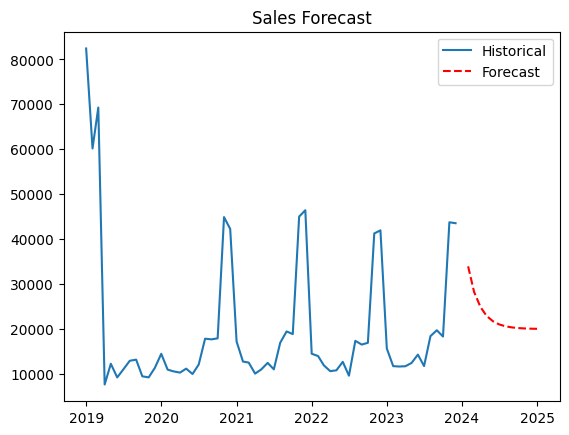

In [20]:
#plot the forecast on chart

plt.plot(monthly_sales.index, monthly_sales['total_sales'], label='Historical')
plt.plot(pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', color='red',linestyle='--')
plt.title('Sales Forecast')
plt.legend()
plt.show()

In [21]:
query = """
SELECT invoice_id, SUM(total) AS total_spent, AVG(rating) AS avg_rating
FROM walmart
GROUP BY invoice_id;
"""
customers = pd.read_sql(query, engine)

# Flag customers with low ratings and low spending
customers['churn_risk'] = ((customers['avg_rating'] < 5) & (customers['total_spent'] < 100)).astype(int)
print(customers[customers['churn_risk'] == 1])



      invoice_id  total_spent  avg_rating  churn_risk
10            11        57.92         4.5           1
19            20        80.60         4.4           1
22            23        66.40         4.4           1
69            70        18.33         4.3           1
97            98        74.70         4.1           1
...          ...          ...         ...         ...
9943        9975        72.00         4.0           1
9947        9979        52.00         3.0           1
9956        9988        46.00         4.0           1
9957        9989        83.00         3.0           1
9963        9995        62.00         3.0           1

[1532 rows x 4 columns]
